In [5]:
import os
import json
import jieba
import pandas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
stop_words = None
with open('../stop_word.txt', 'r') as f:
    stop_words = [word.strip() for word in f.readlines()]
stop_words += [' ']

In [ ]:
def get_words(files):
    words = []
    for file in files:
        with open(os.path.join(path, file), 'r') as f:
            user = json.load(f)
            posts = user['weibo']
            for post in posts:
                words += [word for word in jieba.cut(post['content']) if word not in stop_words]
    return words

In [10]:
path = '../spider/weibo/'
files = os.listdir(path)
words = get_words(files)

In [7]:
with open("words_in_post.txt", 'w') as f:
    f.write('\n'.join(words))

In [8]:
text = '\n'.join(words)
wordcloud = WordCloud(
    font_path=u'./SourceHanSans-Regular.otf', 
    background_color="black", 
    margin=5, 
    width=3600, 
    height=1600).generate(text)

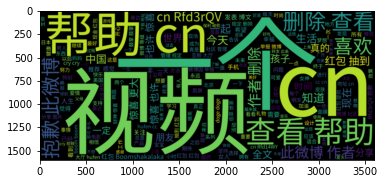

In [9]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('tmp.png', dpi=600)
plt.show()